In [39]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt

df = pd.read_excel("Problem_C_Data_Wordle.xlsx")

df = df.iloc[:, 1:]
df.columns = df.iloc[0]
df = df[1:]


df["Total Percent"] = df.iloc[:, 5:].sum(axis = 1)
df

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Total Percent
1,2022-12-31 00:00:00,560,manly,20380,1899,0,2,17,37,29,12,2,99.0
2,2022-12-30 00:00:00,559,molar,21204,1973,0,4,21,38,26,9,1,99.0
3,2022-12-29 00:00:00,558,havoc,20001,1919,0,2,16,38,30,12,2,100.0
4,2022-12-28 00:00:00,557,impel,20160,1937,0,3,21,40,25,9,1,99.0
5,2022-12-27 00:00:00,556,condo,20879,2012,0,2,17,35,29,14,3,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2022-01-11 00:00:00,206,drink,153880,3017,1,9,35,34,16,5,1,101.0
356,2022-01-10 00:00:00,205,query,107134,2242,1,4,16,30,30,17,2,100.0
357,2022-01-09 00:00:00,204,gorge,91477,1913,1,3,13,27,30,22,4,100.0
358,2022-01-08 00:00:00,203,crank,101503,1763,1,5,23,31,24,14,2,100.0


In [40]:
df["Total Percent"].value_counts()

100.0    179
99.0      96
101.0     71
98.0       9
102.0      4
Name: Total Percent, dtype: int64

In [41]:
df["score"] = 0.5 * (df["1 try"] + df["2 tries"] * 2 + df["3 tries"] * 3 + df["4 tries"] * 4 + df["5 tries"] * 5 + df["6 tries"] * 6) / 100 + 0.5 * df["7 or more tries (X)"] / 100
df["score"] = df["score"].astype("float")


In [42]:
wordfreq = pd.read_csv("WordFreqData.txt", sep=" ")
wordfreq
values_not_in_df1 = df[~df['Word'].isin(wordfreq['name'])]['Word']
# Convert the result to a list if needed
values_not_in_df1_list = values_not_in_df1.tolist()

# Print or use the resulting values 
print(values_not_in_df1_list)
wordfreq

[]


,name,year,percent
0,manly,2019,0.000318
1,molar,2019,0.000304
2,havoc,2019,0.000239
3,impel,2019,0.000028
4,condo,2019,0.000190
...,...,...,...
354,gorge,2019,0.000270
355,crank,2019,0.000155
356,slump,2019,0.000134
357,point,2018,0.030548


In [43]:
df = pd.merge(df, wordfreq, left_on="Word", right_on="name")
df = df.drop("name", axis=1)
df["log_percent"] = np.log(df["percent"])
df

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Total Percent,score,year,percent,log_percent
0,2022-12-31 00:00:00,560,manly,20380,1899,0,2,17,37,29,12,2,99.0,2.110,2019,0.000318,-8.052827
1,2022-12-30 00:00:00,559,molar,21204,1973,0,4,21,38,26,9,1,99.0,2.040,2019,0.000304,-8.097118
2,2022-12-29 00:00:00,558,havoc,20001,1919,0,2,16,38,30,12,2,100.0,2.140,2019,0.000239,-8.340762
3,2022-12-28 00:00:00,557,impel,20160,1937,0,3,21,40,25,9,1,99.0,2.045,2019,0.000028,-10.487171
4,2022-12-27 00:00:00,556,condo,20879,2012,0,2,17,35,29,14,3,100.0,2.135,2019,0.000190,-8.566846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-01-11 00:00:00,206,drink,153880,3017,1,9,35,34,16,5,1,101.0,1.855,2019,0.005603,-5.184515
355,2022-01-10 00:00:00,205,query,107134,2242,1,4,16,30,30,17,2,100.0,2.155,2019,0.000983,-6.925051
356,2022-01-09 00:00:00,204,gorge,91477,1913,1,3,13,27,30,22,4,100.0,2.200,2019,0.000270,-8.216091
357,2022-01-08 00:00:00,203,crank,101503,1763,1,5,23,31,24,14,2,100.0,2.050,2019,0.000155,-8.772995


In [44]:
letterfreq = pd.read_csv("NewLetterFreqData.txt", sep=" ")
letterfreq["Letter"] = letterfreq["Letter"].str.lower()
letterfreq
letterpercent = []
for word in df["Word"]:
    percent = 0.0
    for i in range(len(word)):
        try:
            matches = letterfreq[letterfreq["Letter"] == word[i]]
            percent += float(matches.iloc[0]['Percent']) 
        except:
            print(word)
            print(word[i])
            print(matches)

    letterpercent.append(percent)
print(letterpercent)
df["LetterPercent"] = letterpercent
df


[23.3, 28.1, 25.580000000000002, 28.0, 28.8, 21.95, 36.15, 35.4, 39.0, 32.349999999999994, 27.7, 32.5, 40.3, 37.89999999999999, 26.7, 29.599999999999998, 26.18, 24.099999999999998, 29.169999999999998, 18.0, 35.58, 18.54, 27.0, 34.599999999999994, 25.85, 30.799999999999997, 30.069999999999997, 38.7, 36.400000000000006, 31.999999999999996, 37.449999999999996, 24.5, 29.3, 34.99999999999999, 20.099999999999998, 34.4, 27.0, 38.5, 30.98, 30.0, 25.25, 29.38, 36.98, 16.0, 46.599999999999994, 29.169999999999998, 31.2, 29.2, 41.3, 34.98, 31.599999999999998, 38.3, 29.9, 28.9, 29.9, 40.3, 33.6, 32.1, 26.8, 37.4, 30.3, 25.2, 23.774, 29.2, 34.67, 25.0, 25.6, 15.7, 26.299999999999997, 12.0, 31.9, 29.18, 33.1, 16.665, 35.25, 41.8, 33.4, 29.0, 27.2, 27.794999999999998, 31.0, 24.48, 29.049999999999997, 22.3, 23.48, 25.5, 33.0, 29.0, 19.9, 31.099999999999998, 37.9, 38.58, 29.3, 25.599999999999998, 19.799999999999997, 19.8, 21.57, 31.0, 38.0, 21.5, 37.3, 31.599999999999998, 32.67, 37.6, 25.97, 33.5, 34.8,

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Total Percent,score,year,percent,log_percent,LetterPercent
0,2022-12-31 00:00:00,560,manly,20380,1899,0,2,17,37,29,12,2,99.0,2.110,2019,0.000318,-8.052827,23.300
1,2022-12-30 00:00:00,559,molar,21204,1973,0,4,21,38,26,9,1,99.0,2.040,2019,0.000304,-8.097118,28.100
2,2022-12-29 00:00:00,558,havoc,20001,1919,0,2,16,38,30,12,2,100.0,2.140,2019,0.000239,-8.340762,25.580
3,2022-12-28 00:00:00,557,impel,20160,1937,0,3,21,40,25,9,1,99.0,2.045,2019,0.000028,-10.487171,28.000
4,2022-12-27 00:00:00,556,condo,20879,2012,0,2,17,35,29,14,3,100.0,2.135,2019,0.000190,-8.566846,28.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-01-11 00:00:00,206,drink,153880,3017,1,9,35,34,16,5,1,101.0,1.855,2019,0.005603,-5.184515,24.770
355,2022-01-10 00:00:00,205,query,107134,2242,1,4,16,30,30,17,2,100.0,2.155,2019,0.000983,-6.925051,23.595
356,2022-01-09 00:00:00,204,gorge,91477,1913,1,3,13,27,30,22,4,100.0,2.200,2019,0.000270,-8.216091,30.200
357,2022-01-08 00:00:00,203,crank,101503,1763,1,5,23,31,24,14,2,100.0,2.050,2019,0.000155,-8.772995,24.470


In [45]:
df = df.rename(columns={'percent': 'WordPercent'})
df = df.rename(columns={'log_percent': 'WordLogPercent'})
df

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Total Percent,score,year,WordPercent,WordLogPercent,LetterPercent
0,2022-12-31 00:00:00,560,manly,20380,1899,0,2,17,37,29,12,2,99.0,2.110,2019,0.000318,-8.052827,23.300
1,2022-12-30 00:00:00,559,molar,21204,1973,0,4,21,38,26,9,1,99.0,2.040,2019,0.000304,-8.097118,28.100
2,2022-12-29 00:00:00,558,havoc,20001,1919,0,2,16,38,30,12,2,100.0,2.140,2019,0.000239,-8.340762,25.580
3,2022-12-28 00:00:00,557,impel,20160,1937,0,3,21,40,25,9,1,99.0,2.045,2019,0.000028,-10.487171,28.000
4,2022-12-27 00:00:00,556,condo,20879,2012,0,2,17,35,29,14,3,100.0,2.135,2019,0.000190,-8.566846,28.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-01-11 00:00:00,206,drink,153880,3017,1,9,35,34,16,5,1,101.0,1.855,2019,0.005603,-5.184515,24.770
355,2022-01-10 00:00:00,205,query,107134,2242,1,4,16,30,30,17,2,100.0,2.155,2019,0.000983,-6.925051,23.595
356,2022-01-09 00:00:00,204,gorge,91477,1913,1,3,13,27,30,22,4,100.0,2.200,2019,0.000270,-8.216091,30.200
357,2022-01-08 00:00:00,203,crank,101503,1763,1,5,23,31,24,14,2,100.0,2.050,2019,0.000155,-8.772995,24.470


In [46]:
#Correlations

df.dtypes
pearson_Score_vs_Wordpercent = df["score"].corr(df["WordLogPercent"])
spearman_Score_vs_Wordpercent = df["score"].corr(df["WordLogPercent"], method='spearman')
print("Log Word Percent vs Score")
print("Pearson: ", pearson_Score_vs_Wordpercent)
print("Spearman: ", spearman_Score_vs_Wordpercent)

pearson_Score_vs_LetterPercent = df["score"].corr(df["LetterPercent"])
spearman_Score_vs_LetterPercent = df["score"].corr(df["LetterPercent"], method='spearman')
print("\nLetter Percent vs Score")
print("Pearson: ",pearson_Score_vs_LetterPercent)
print("Spearman: ",spearman_Score_vs_LetterPercent)

pearson_Score_vs_Wordpercent = df["score"].corr(df["WordPercent"])
spearman_Score_vs_Wordpercent = df["score"].corr(df["WordPercent"], method='spearman')
print("\nWord Percent vs Score")
print("Pearson: ",pearson_Score_vs_Wordpercent)
print("Spearman: ",spearman_Score_vs_Wordpercent)

Log Word Percent vs Score
Pearson:  -0.25233441602166184
Spearman:  -0.2559762873555155

Letter Percent vs Score
Pearson:  -0.3765592829892012
Spearman:  -0.35291094408522367

Word Percent vs Score
Pearson:  -0.1794688603720434
Spearman:  -0.2559762873555155


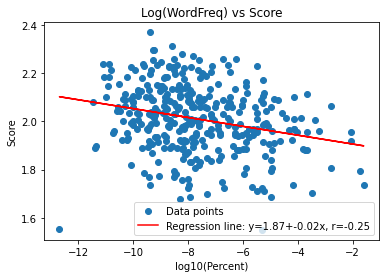

In [47]:
import scipy.stats
x = df["WordLogPercent"]
y = df["score"]
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line
plt.figure()
plt.scatter(x, y, label='Data points')
plt.plot(x, intercept + slope * x, label=line, c = 'r')
plt.xlabel('log10(Percent)')
plt.ylabel('Score')
plt.legend(facecolor='white')
plt.title("Log(WordFreq) vs Score")
plt.show()

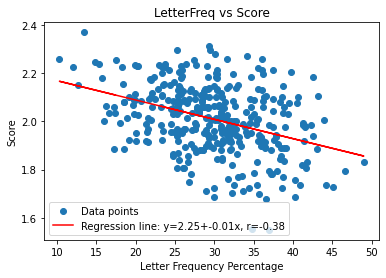

In [48]:
import scipy.stats
x = df["LetterPercent"]
y = df["score"]
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line
plt.figure()
plt.scatter(x, y, label='Data points')
plt.plot(x, intercept + slope * x, label=line, c = 'r')
plt.xlabel('Letter Frequency Percentage')
plt.ylabel('Score')
plt.legend(facecolor='white')
plt.title("LetterFreq vs Score")
plt.show()

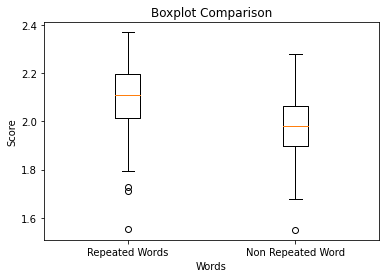

Repeated Scores Stats:
	Median: 2.11
	Box Length: 0.1825
	Outliers: 3
Repeated Scores Stats:
	Median: 1.98
	Box Length: 0.1625
	Outliers: 1

Comparison:
	Median Difference: 0.13
	Box Length Difference: 0.02
	Outlier Difference: 2


In [49]:
from collections import Counter
repeated = []
nonrepeated = []

for word in df["Word"]:
    letters = Counter(word)
    if max( letters.values()) > 1:
        repeated.append(word)
    else:
        nonrepeated.append(word)

# print(repeated)
# print(nonrepeated)

repeated_scores = df[df['Word'].isin(repeated)]['score']
nonrepeated_scores = df[df['Word'].isin(nonrepeated)]['score']

plt.figure()
plt.boxplot([repeated_scores, nonrepeated_scores], vert=True, labels=["Repeated Words", "Non Repeated Word"])
plt.xlabel("Words")
plt.ylabel("Score")
plt.title("Boxplot Comparison")
plt.show()

repeated_median = round(np.median(repeated_scores), 2)
repeated_box_length = round(np.percentile(repeated_scores, 75) - np.percentile(repeated_scores, 25), 4)
print(f"Repeated Scores Stats:\n\tMedian: {repeated_median}\n\tBox Length: {repeated_box_length}\n\tOutliers: 3")

nonrepeated_median = round(np.median(nonrepeated_scores), 2)
nonrepeated_box_length = round(np.percentile(nonrepeated_scores, 75) - np.percentile(nonrepeated_scores, 25),4)
print(f"Repeated Scores Stats:\n\tMedian: {nonrepeated_median}\n\tBox Length: {nonrepeated_box_length}\n\tOutliers: 1")

median_difference = round((repeated_median - nonrepeated_median),2)
box_length_difference = round((repeated_box_length - nonrepeated_box_length),5)
print(f"\nComparison:\n\tMedian Difference: {median_difference}\n\tBox Length Difference: {box_length_difference}\n\tOutlier Difference: {2}")

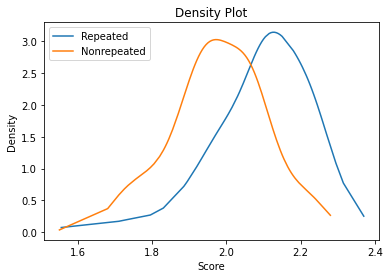

In [50]:
from scipy.stats import gaussian_kde

density = gaussian_kde(repeated_scores)
density1 = gaussian_kde(nonrepeated_scores)


plt.plot(sorted(repeated_scores), density(sorted(repeated_scores)), label='Repeated')
plt.plot(sorted(nonrepeated_scores), density1(sorted(nonrepeated_scores)), label='Nonrepeated')


plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Density Plot')

plt.legend()
plt.show()

In [60]:
from nltk import pos_tag

# Download NLTK resources 
# nltk.download('averaged_perceptron_tagger')

pos_tags = pos_tag(df["Word"])

nouns = [word for word, pos in pos_tags if pos.startswith('NN')]
adjectives = [word for word, pos in pos_tags if pos.startswith('JJ')]
adverbs = [word for word, pos in pos_tags if pos.startswith('RB')]
verbs = [word for word, pos in pos_tags if pos.startswith('VB')]

print("Nouns:", nouns)
print("Adjectives:", adjectives)
print("Adverbs:", adverbs)
print("Verbs:", verbs)
print(len(nouns) + len(adjectives) + len(adverbs) + len(verbs))
print("NOT ALL WORDS FIT IN THESE FOUR CATEGORIES")


Nouns: ['havoc', 'impel', 'condo', 'judge', 'poise', 'aorta', 'excel', 'slate', 'chord', 'probe', 'knock', 'braid', 'infer', 'joust', 'chafe', 'eject', 'study', 'tepid', 'itchy', 'feast', 'drive', 'axiom', 'glyph', 'baker', 'snarl', 'maple', 'inane', 'valet', 'medal', 'rainy', 'spell', 'dream', 'photo', 'aloud', 'piney', 'sneak', 'carry', 'flout', 'fault', 'mummy', 'spiel', 'denim', 'quirk', 'catch', 'floor', 'ionic', 'enjoy', 'howdy', 'vigor', 'twine', 'admit', 'grate', 'glory', 'saint', 'recap', 'trice', 'stick', 'chute', 'parer', 'doubt', 'thyme', 'alpha', 'booze', 'tibia', 'theme', 'class', 'leery', 'taunt', 'whoop', 'inter', 'fungi', 'gauze', 'ruder', 'irony', 'merit', 'waste', 'treat', 'shrug', 'twang', 'poker', 'khaki', 'hunky', 'glean', 'alien', 'buggy', 'rhyme', 'youth', 'quart', 'cramp', 'bluff', 'stomp', 'motto', 'cinch', 'power', 'midge', 'tryst', 'flock', 'roomy', 'wedge', 'liver', 'bland', 'night', 'madam', 'berth', 'voice', 'agape', 'field', 'sever', 'lilac', 'pinto', 'h

In [63]:
nouns_score = df[df['Word'].isin(nouns)]['score']
adjectives_score = df[df['Word'].isin(adjectives)]['score']
adverbs_score = df[df['Word'].isin(adverbs)]['score']
verbs_score = df[df['Word'].isin(verbs)]['score']

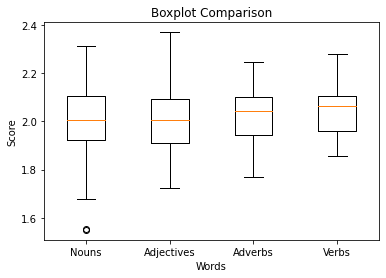

Repeated Scores Stats:
	Median: 2.01

Repeated Scores Stats:
	Median: 2.01

Repeated Scores Stats:
	Median: 2.04

Repeated Scores Stats:
	Median: 2.06


Comparison:
	Noun-Adjective Median Difference: 0.0
	Noun-Adverb Median Difference: -0.03
	Noun-Verb Median Difference: -0.05
	Noun-Adjective Median Difference: 0.13


In [64]:
plt.figure()
plt.boxplot([nouns_score, adjectives_score, adverbs_score, verbs_score], vert=True, labels=["Nouns", "Adjectives", "Adverbs", "Verbs"])
plt.xlabel("Words")
plt.ylabel("Score")
plt.title("Boxplot Comparison")
plt.show()

nouns_median = round(np.median(nouns_score), 2)
print(f"Repeated Scores Stats:\n\tMedian: {nouns_median}\n")

adjectives_median = round(np.median(adjectives_score), 2)
print(f"Repeated Scores Stats:\n\tMedian: {adjectives_median}\n")

adverbs_median = round(np.median(adverbs_score), 2)
print(f"Repeated Scores Stats:\n\tMedian: {adverbs_median}\n")

verbs_median = round(np.median(verbs_score), 2)
print(f"Repeated Scores Stats:\n\tMedian: {verbs_median}\n")

na_median_difference = round((nouns_median - adjectives_median),2)
nav_median_difference = round((nouns_median - adverbs_median),2)
nv_median_difference = round((nouns_median - verbs_median),2)
print(f"\nComparison:\n\tNoun-Adjective Median Difference: {na_median_difference}\n\tNoun-Adverb Median Difference: {nav_median_difference}\n\tNoun-Verb Median Difference: {nv_median_difference}\n\tNoun-Adjective Median Difference: {median_difference}")

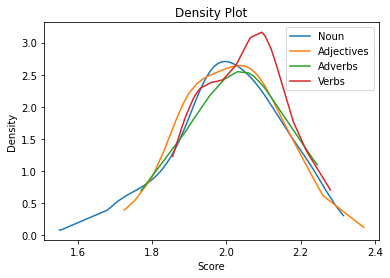

In [67]:
noun_density = gaussian_kde(nouns_score)
adj_density = gaussian_kde(adjectives_score)
adv_density = gaussian_kde(adverbs_score)
verb_density = gaussian_kde(verbs_score)


plt.plot(sorted(nouns_score), noun_density(sorted(nouns_score)), label='Noun')
plt.plot(sorted(adjectives_score), adj_density(sorted(adjectives_score)), label='Adjectives')
plt.plot(sorted(adverbs_score), adv_density(sorted(adverbs_score)), label='Adverbs')
plt.plot(sorted(verbs_score), verb_density(sorted(verbs_score)), label='Verbs')


plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Density Plot')

plt.legend()
plt.show()

In [70]:
def check_word(word):
    return 1.5 if word in repeated else 1

df["Rep"] = df['Word'].apply(lambda x: check_word(x))
df
df.to_csv("data.csv", index=False)